# Assignment 3 - Building a Custom Visualization

---

In this assignment you must choose one of the options presented below and submit a visual as well as your source code for peer grading. The details of how you solve the assignment are up to you, although your assignment must use matplotlib so that your peers can evaluate your work. The options differ in challenge level, but there are no grades associated with the challenge level you chose. However, your peers will be asked to ensure you at least met a minimum quality for a given technique in order to pass. Implement the technique fully (or exceed it!) and you should be able to earn full grades for the assignment.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ferreira, N., Fisher, D., & Konig, A. C. (2014, April). [Sample-oriented task-driven visualizations: allowing users to make better, more confident decisions.](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In Proceedings of the SIGCHI Conference on Human Factors in Computing Systems (pp. 571-580). ACM. ([video](https://www.youtube.com/watch?v=BI7GAs-va-Q))


In this [paper](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) the authors describe the challenges users face when trying to make judgements about probabilistic data generated through samples. As an example, they look at a bar chart of four years of data (replicated below in Figure 1). Each year has a y-axis value, which is derived from a sample of a larger dataset. For instance, the first value might be the number votes in a given district or riding for 1992, with the average being around 33,000. On top of this is plotted the 95% confidence interval for the mean (see the boxplot lectures for more information, and the yerr parameter of barcharts).

<br>
<img src="readonly/Assignment3Fig1.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Figure 1 from (Ferreira et al, 2014).</h4>

<br>

A challenge that users face is that, for a given y-axis value (e.g. 42,000), it is difficult to know which x-axis values are most likely to be representative, because the confidence levels overlap and their distributions are different (the lengths of the confidence interval bars are unequal). One of the solutions the authors propose for this problem (Figure 2c) is to allow users to indicate the y-axis value of interest (e.g. 42,000) and then draw a horizontal line and color bars based on this value. So bars might be colored red if they are definitely above this value (given the confidence interval), blue if they are definitely below this value, or white if they contain this value.


<br>
<img src="readonly/Assignment3Fig2c.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  Figure 2c from (Ferreira et al. 2014). Note that the colorbar legend at the bottom as well as the arrows are not required in the assignment descriptions below.</h4>

<br>
<br>

**Easiest option:** Implement the bar coloring as described above - a color scale with only three colors, (e.g. blue, white, and red). Assume the user provides the y axis value of interest as a parameter or variable.


**Harder option:** Implement the bar coloring as described in the paper, where the color of the bar is actually based on the amount of data covered (e.g. a gradient ranging from dark blue for the distribution being certainly below this y-axis, to white if the value is certainly contained, to dark red if the value is certainly not contained as the distribution is above the axis).

**Even Harder option:** Add interactivity to the above, which allows the user to click on the y axis to set the value of interest. The bar colors should change with respect to what value the user has selected.

**Hardest option:** Allow the user to interactively set a range of y values they are interested in, and recolor based on this (e.g. a y-axis band, see the paper for more details).

---

*Note: The data given for this assignment is not the same as the data used in the article and as a result the visualizations may look a little different.*

In [1]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


<IPython.core.display.Javascript object>


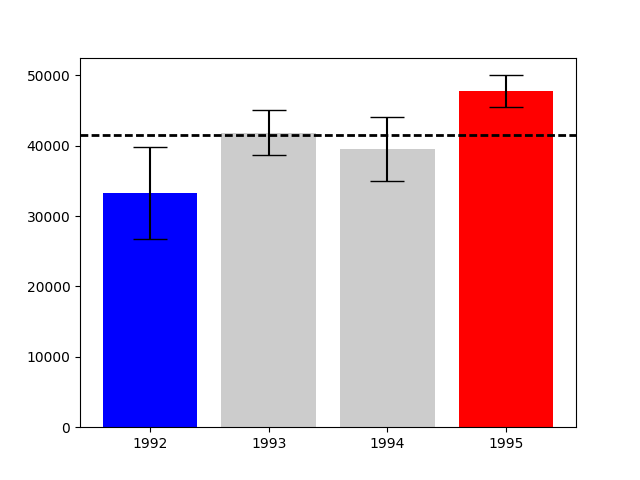

In [4]:
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib notebook


def plotMeanBarCharteasy(y,df):
    dfMean=df.mean(axis=1) #get the mean over columns
    #Get the confidence interval using Scipy, note that we need to get the sem over each row so we use apply
    confInterval=st.t.interval(0.95, len(df.columns)-1, loc=dfMean, scale=df.apply(st.sem, axis=1)) 
    confIntervalDown=dfMean.values-confInterval[0] #The results are absolute value, but we need to pass the distance to the mean
    confIntervalUp=confInterval[1]-dfMean.values 
    #Set colors depending on the interval range using RGBA
    color=[]
    for low,high in zip(confInterval[0],confInterval[1]):
        if(high < y):
            color.append([0,0,1,1]) #Blue
        elif(low>y):
            color.append([1,0,0,1]) #Red
        else:
            color.append([0.8,0.8,0.8,1]) #Gray
    #Plotting
    plt.figure()
    plt.bar(df.index,dfMean,yerr=[confIntervalDown,confIntervalUp],color=color, capsize=12) #Plot barchart
    plt.xticks(df.index, ('1992', '1993', '1994', '1995')); #set fixed X ticks
    plt.axhline(y=y, color='black', linewidth=2, linestyle='--'); #set horizontal line equivalent to y
plotMeanBarCharteasy(41500,df)

<IPython.core.display.Javascript object>


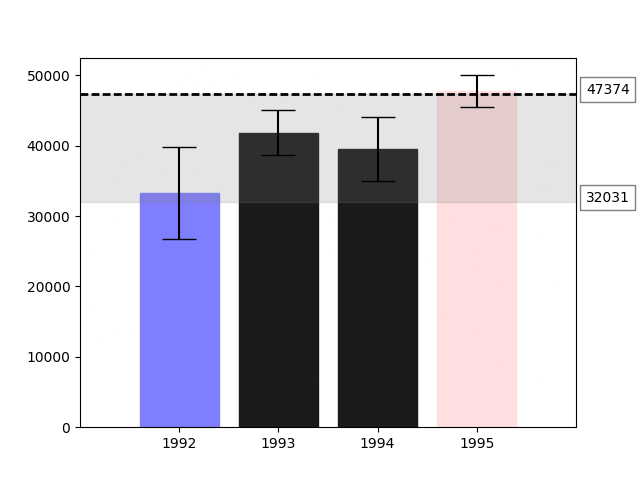

In [3]:
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib notebook
def plotMeanBarChartHardest(ylow,yhigh,df):
    dfMean=df.mean(axis=1) #get the mean over columns
    #Get the confidence interval using Scipy, note that we need to get the sem over each row so we use apply
    confInterval=st.t.interval(0.95, len(df.columns)-1, loc=dfMean, scale=df.apply(st.sem, axis=1)) 
    confIntervalDown=dfMean.values-confInterval[0] #The results are absolute value, but we need to pass the distance to the mean
    confIntervalUp=confInterval[1]-dfMean.values 
    #Set colors depending on the interval range using RGBA
    def calculateColors(ylow,yhigh):
        color=[]
        for low,high in zip(confInterval[0],confInterval[1]):
            if(high<ylow):
                color.append([0,0,1,1]) #Blue for below bars
            elif(low>yhigh):
                color.append([1,0,0,1]) #Red for above bars
            elif(low<ylow and high>yhigh):
                color.append([0.8,0.8,0.8,0.3]) #Gray for range contained in bars
            elif(low>ylow and high<yhigh):
                color.append([0.1,0.1,0.1,1]) #Black for bars contained in range
            #Both of these Elif deal with the overlapping of ranges and calculate a gradient based on the degree of overlapping 
            #as well as the location of the ranges for blue or red colors
            elif(low<ylow and high>ylow):
                overlap=(high-ylow)/(yhigh-ylow)
                color.append([1-overlap,1-overlap,1,1])    
            elif(low>ylow and high>yhigh):
                overlap=(yhigh-low)/(yhigh-ylow)
                color.append([1,1-overlap,1-overlap,1])
        return color
        
    colors=calculateColors(ylow,yhigh)         
    #Plotting
    plt.figure()
    bars=plt.bar(df.index,dfMean,yerr=[confIntervalDown,confIntervalUp],color=colors, capsize=12) #Plot barchart
    plt.xticks(df.index, ('1992', '1993', '1994', '1995')); #set fixed X ticks
    yplotmin=plt.axhline(y=ylow, color='black',alpha=1, linewidth=2, linestyle='--'); #set horizontal line equivalent to y
    yplotmax=plt.axhline(y=yhigh, color='black',alpha=1, linewidth=2, linestyle='--'); #set horizontal line equivalent to y
    fill=plt.fill([1991,1991,1996,1996],[ylow,yhigh,yhigh,ylow],color='gray',alpha=0.2) #a gray polygon indicating the range
    plt.xlim([1991, 1996]) #limit axes for better visibility
    
    ymaxtext=plt.text(1996.1, yhigh,s='%d' %yhigh,bbox=dict(facecolor='white', alpha=0.5)) # A couple of text on the side for precision
    ymintext=plt.text(1996.1, ylow,s='%d' %ylow,bbox=dict(facecolor='white', alpha=0.5))
    yplotmin.set_ydata(ylow) #small hack to remove the double array values into a single value
    yplotmax.set_ydata(yhigh)
    
    
    def mouse_press(event):
        dymax=float(abs((event.ydata-yplotmax.get_ydata())/yplotmax.get_ydata())) #get dy to top line
        dymin=float(abs((event.ydata-yplotmin.get_ydata())/yplotmin.get_ydata())) #get dy to bot line
        #if it'sa left click and delta is small enough and the line is selected... this line is selected is using the alpha value
        #This is a less than ideal practice, but there is no easy workaround for this in python, once the canvas is
        #interactive mode you're limited to using variables inside the canvas.
        if(event.button==1 and dymax<=0.01 and yplotmax.get_alpha()==1):
            yplotmax.set_color('Red')
            yplotmax.set_alpha(0.99)
            return
        elif(event.button==1 and dymax<=0.01 and yplotmax.get_alpha()==0.99):
            yplotmax.set_color('Black')
            yplotmax.set_alpha(1)
            return
        elif(event.button==1 and dymin<=0.01 and yplotmin.get_alpha()==1):
            yplotmin.set_color('Red')
            yplotmin.set_alpha(0.99)
            return
        elif(event.button==1 and dymin<=0.01 and yplotmin.get_alpha()==0.99):
            yplotmin.set_color('Black')
            yplotmin.set_alpha(1)
            return
        
    
    def mouse_move(event):
        #Going from the same logic above, we only want to move the line if it's selected, AKA if the alpha is 0.99
        yMaxSelected=yplotmax.get_alpha()==0.99
        yMinSelected=yplotmin.get_alpha()==0.99
        if(yMaxSelected):
            line=yplotmax
            text=ymaxtext
        elif(yMinSelected):
            line=yplotmin
            text=ymintext
        line.set_ydata(event.ydata) #move the line
        text.set_text('%d' %event.ydata) #update the text 
        text.set_position((1996.1, event.ydata))#and the position
        #this one is also a bit clunky in matplotlib. A fill is made up of polygon objects, so to access the fill rectangle you
        #need to iterate over the polygons (only one in this case) and update the 5 points of the vertex, 4 vertex + start point to close polygon
        for x in fill:
            x.set_xy([[1991.,yplotmin.get_ydata()],[1991.,yplotmax.get_ydata()],[1996.,yplotmax.get_ydata()],[1996.,yplotmin.get_ydata()],[1991.,yplotmin.get_ydata()]])
        
        #This is just to ensure you're drawing colors based on the location of the lines and not the actual original lines
        botline=min(yplotmin.get_ydata(),yplotmax.get_ydata()) 
        topline=max(yplotmin.get_ydata(),yplotmax.get_ydata())
        colors=calculateColors(botline,topline)
        for i in range(4):
            bars[i].set_color(colors[i]) 
    
    #Add the events
    plt.gcf().canvas.mpl_connect('motion_notify_event', mouse_move)
    plt.gcf().canvas.mpl_connect('button_press_event', mouse_press)
    return plt

pl=plotMeanBarChartHardest(37000,43000,df) #Enjoy!
